## Лабораторная № 1. Базовая обработка и анализ текста.

*Кузьмина Н.В. J4140*

### 1. Скачайте данные отзывов о банковских услугах из папки курса (“data/financial_review.csv”).



In [271]:
import pandas as pd
import numpy as np

In [272]:
df = pd.read_csv('financial_review.csv')

### 2. Выберете один из банков (поле “bank_name”), отфильтуйте отзывы только для рассматриваемого банка.

In [273]:
# Выведем названия всех банков
selected_banks = df.loc[df['score'] != 0, 'bank_name'].unique()
selected_banks

array(['кредит европа банк', 'райффайзенбанк', 'локо-банк', 'сбербанк',
       'банк ак барс', 'бинбанк', 'первомайский', 'русский стандарт',
       'открытие', 'русфинанс банк', 'авангард', 'втб', 'альфа-банк',
       'бфг-кредит', 'уральский банк реконструкции и развития',
       'скб-банк', 'киви банк', 'тимер банк', 'юникредит банк',
       'совкомбанк', 'росбанк', 'почта банк', 'восточный экспресс банк',
       'мособлбанк', 'образование', 'нальчик', 'смп банк',
       'тинькофф банк', 'снежинский', 'хоум кредит банк',
       'международный расчетный банк', 'уралсиб', 'форус банк',
       'сетелем банк', 'инвесткапиталбанк', 'связь-банк', 'промсвязьбанк',
       'газпромбанк', 'россельхозбанк', 'экономический союз', 'бкс',
       'модульбанк', 'банк траст', 'ум-банк', 'отп банк', 'ситибанк',
       'новопокровский', 'аверс', 'мкб', 'банк «санкт-петербург»',
       'кошелев-банк', 'активкапитал банк', nan, 'югра', 'меткомбанк',
       'заубер банк', 'вуз-банк', 'глобэкс', 'челябинв

In [274]:
selected_bank = 'альфа-банк'

In [275]:
# Фильтрация отзывов только для выбранного банка
selected_reviews = df[df['bank_name'] == selected_bank]
selected_reviews

,bank_href,login,review,bank_name,site,date,message_href,score,status,user_href
1123,/alfa-bank.html,NaN,История номер раз\nКредитная карта Aeroflot Go...,альфа-банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
1124,/alfa-bank.html,NaN,"Отличный банк Хорошие депозиты, высокие процен...",альфа-банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
1125,/alfa-bank.html,NaN,Только что с жену ограбили во время съёма дене...,альфа-банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
1126,/alfa-bank.html,NaN,Заполнила заявку на получение дебетовой карты ...,альфа-банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
1127,/alfa-bank.html,NaN,О сервисе Альфа-клик думаю плохо. Очень плохо....,альфа-банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
20984,/bank/alfa-bank/,"Юрий,","Прямо приятно было деньги отдавать :-) Нет, ну...",альфа-банк,https://www.sravni.ru,"19 окт, 2015",/bank/alfa-bank/otzyv/178722/?page,5,NaN,NaN
20985,/bank/alfa-bank/,"Павел,",Хороший банкХороший банк,альфа-банк,https://www.sravni.ru,"20 окт, 2015",/bank/alfa-bank/otzyv/83/?page,2,NaN,NaN
20986,/bank/alfa-bank/,"Анна Мордовченко,",Общение с клиентами дистанционноОформила креди...,альфа-банк,https://www.sravni.ru,"30 сент, 2018",/bank/alfa-bank/otzyv/299285/?page,3,NaN,NaN
20987,/bank/alfa-bank/,"оксана,",Нарушены все сроки рассмотрения заявок на ипот...,альфа-банк,https://www.sravni.ru,"03 окт, 2018",/bank/alfa-bank/otzyv/299519/?page,1,NaN,NaN


### 3. Выполните всю необходимую предварительную обработку текста (удаление лишних символов, стемминг/лемматизация, токенизация и т.д.).

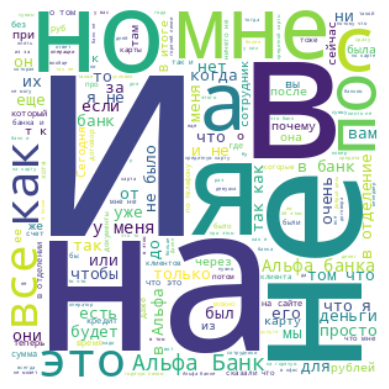

In [276]:
# Предобработка данных

# облако слов
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Объединение всех строк из столбца 'review' в одну строку
text = ' '.join(selected_reviews['review'].astype(str))

# Создание облака слов
wc = WordCloud(width=300, height=300, background_color="white")
wc.generate(text)

# Отрисовка облака слов
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [277]:
# Токенезация
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [278]:
# Удаление пунктации
from string import punctuation

# записываем в переменную punctuations список существующих пунктуационных знаков
punctuations = list(punctuation)
punctuations.extend(['«', '»', '„', '“', '...', '—', '"', '``', "''"])
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '«', '»', '„', '“', '...', '—', '"', '``', "''"]


In [279]:
# Удаление стоп-слов
stopwords = nltk.corpus.stopwords.words('russian')
stopwords.extend(['который', 'это', 'такой', 'всё', 'ещё', 'весь', 'из-за', 'что-то', 'какой-то', 'как-то', 'кто-то', 'какой-либо', 'свой', 'ваш', 'наш'])
print(stopwords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [105]:
# Лемматизация
!pip install pymorphy2

In [280]:
import pymorphy2

In [281]:
#записываем в morph лемматизатор
morph = pymorphy2.MorphAnalyzer()

In [282]:
# Функция для предобработки текста
def preprocessing(text):
  tokens = word_tokenize(text)
  tokens_without_punct = [i for i in tokens if i not in punctuations]
  low_tokens = [i.lower() for i in tokens_without_punct]
  lemms = [morph.parse(i)[0].normal_form for i in low_tokens]
  words_without_stop = [i for i in lemms if i not in stopwords]
  return words_without_stop

In [283]:
# Преобразование значений столбца 'review' в строки
selected_reviews['review'] = selected_reviews['review'].astype(str)

# Применение функции preprocessing к столбцу 'review' и создание нового столбца 'preprocessed_text'
selected_reviews['preprocessed_text'] = selected_reviews['review'].apply(preprocessing)
selected_reviews

<ipython-input-283-85bb721321b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_reviews['review'] = selected_reviews['review'].astype(str)
<ipython-input-283-85bb721321b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_reviews['preprocessed_text'] = selected_reviews['review'].apply(preprocessing)


,bank_href,login,review,bank_name,site,date,message_href,score,status,user_href,preprocessed_text
1123,/alfa-bank.html,NaN,История номер раз\nКредитная карта Aeroflot Go...,альфа-банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN,"[история, номер, кредитный, карта, aeroflot, g..."
1124,/alfa-bank.html,NaN,"Отличный банк Хорошие депозиты, высокие процен...",альфа-банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN,"[отличный, банк, хороший, депозит, высокий, пр..."
1125,/alfa-bank.html,NaN,Только что с жену ограбили во время съёма дене...,альфа-банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN,"[жена, ограбить, время, съём, деньга, банкомат..."
1126,/alfa-bank.html,NaN,Заполнила заявку на получение дебетовой карты ...,альфа-банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN,"[заполнить, заявка, получение, дебетовый, карт..."
1127,/alfa-bank.html,NaN,О сервисе Альфа-клик думаю плохо. Очень плохо....,альфа-банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN,"[сервис, альфа-клик, думать, плохо, очень, пло..."
...,...,...,...,...,...,...,...,...,...,...,...
20984,/bank/alfa-bank/,"Юрий,","Прямо приятно было деньги отдавать :-) Нет, ну...",альфа-банк,https://www.sravni.ru,"19 окт, 2015",/bank/alfa-bank/otzyv/178722/?page,5,NaN,NaN,"[прямо, приятно, деньга, отдавать, правда, слу..."
20985,/bank/alfa-bank/,"Павел,",Хороший банкХороший банк,альфа-банк,https://www.sravni.ru,"20 окт, 2015",/bank/alfa-bank/otzyv/83/?page,2,NaN,NaN,"[хороший, банкхороший, банк]"
20986,/bank/alfa-bank/,"Анна Мордовченко,",Общение с клиентами дистанционноОформила креди...,альфа-банк,https://www.sravni.ru,"30 сент, 2018",/bank/alfa-bank/otzyv/299285/?page,3,NaN,NaN,"[общение, клиент, дистанционнооформить, кредит..."
20987,/bank/alfa-bank/,"оксана,",Нарушены все сроки рассмотрения заявок на ипот...,альфа-банк,https://www.sravni.ru,"03 окт, 2018",/bank/alfa-bank/otzyv/299519/?page,1,NaN,NaN,"[нарушить, срок, рассмотрение, заявка, ипотека..."


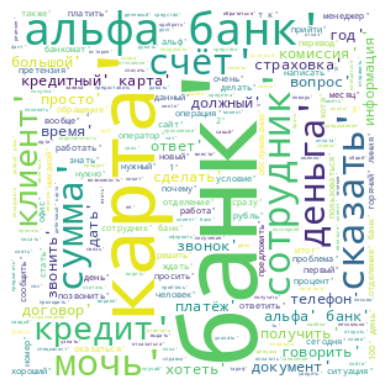

In [284]:
preprocessed_text = ' '.join(selected_reviews['preprocessed_text'].astype(str))

# Создание облака слов
wc = WordCloud(width=300, height=300, background_color="white")
wc.generate(preprocessed_text)

# Отрисовка облака слов
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

### 4. Найдите Топ-10 наиболее часто используемых слов в отзывах.

In [285]:
from collections import Counter

# Наиболее часто используемые слова в отзывах
all_words = [word for review in selected_reviews['preprocessed_text'] for word in review]
top_10_words = Counter(all_words).most_common(10)
print('Top 10 наиболее часто используемых слов:', top_10_words)

Top 10 наиболее часто используемых слов: [('банк', 4530), ('карта', 2965), ('день', 1321), ('счёт', 1252), ('сотрудник', 1204), ('клиент', 1099), ('кредит', 994), ('деньга', 983), ('альфа-банк', 982), ('год', 932)]


### 5. Разделите отзывы на положительные и отрицательные с использованием значения в поле «score» (например, 1,2- негативные, 4,5-позитивные).

In [286]:
selected_reviews['score'].isna().sum()

244

In [287]:
selected_reviews['score'] = pd.to_numeric(df['score'], errors='coerce')

<ipython-input-287-b421fb32cd27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_reviews['score'] = pd.to_numeric(df['score'], errors='coerce')


In [288]:
mean_score = np.nanmean(selected_reviews['score'])
mean_score

1.9028248587570622

In [289]:
selected_reviews['score'] = selected_reviews['score'].fillna(mean_score)
selected_reviews

<ipython-input-289-391832db3bf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_reviews['score'] = selected_reviews['score'].fillna(mean_score)


,bank_href,login,review,bank_name,site,date,message_href,score,status,user_href,preprocessed_text
1123,/alfa-bank.html,NaN,История номер раз\nКредитная карта Aeroflot Go...,альфа-банк,http://bankireview.ru,NaN,NaN,1.902825,NaN,NaN,"[история, номер, кредитный, карта, aeroflot, g..."
1124,/alfa-bank.html,NaN,"Отличный банк Хорошие депозиты, высокие процен...",альфа-банк,http://bankireview.ru,NaN,NaN,1.902825,NaN,NaN,"[отличный, банк, хороший, депозит, высокий, пр..."
1125,/alfa-bank.html,NaN,Только что с жену ограбили во время съёма дене...,альфа-банк,http://bankireview.ru,NaN,NaN,1.902825,NaN,NaN,"[жена, ограбить, время, съём, деньга, банкомат..."
1126,/alfa-bank.html,NaN,Заполнила заявку на получение дебетовой карты ...,альфа-банк,http://bankireview.ru,NaN,NaN,1.902825,NaN,NaN,"[заполнить, заявка, получение, дебетовый, карт..."
1127,/alfa-bank.html,NaN,О сервисе Альфа-клик думаю плохо. Очень плохо....,альфа-банк,http://bankireview.ru,NaN,NaN,1.902825,NaN,NaN,"[сервис, альфа-клик, думать, плохо, очень, пло..."
...,...,...,...,...,...,...,...,...,...,...,...
20984,/bank/alfa-bank/,"Юрий,","Прямо приятно было деньги отдавать :-) Нет, ну...",альфа-банк,https://www.sravni.ru,"19 окт, 2015",/bank/alfa-bank/otzyv/178722/?page,5.000000,NaN,NaN,"[прямо, приятно, деньга, отдавать, правда, слу..."
20985,/bank/alfa-bank/,"Павел,",Хороший банкХороший банк,альфа-банк,https://www.sravni.ru,"20 окт, 2015",/bank/alfa-bank/otzyv/83/?page,2.000000,NaN,NaN,"[хороший, банкхороший, банк]"
20986,/bank/alfa-bank/,"Анна Мордовченко,",Общение с клиентами дистанционноОформила креди...,альфа-банк,https://www.sravni.ru,"30 сент, 2018",/bank/alfa-bank/otzyv/299285/?page,3.000000,NaN,NaN,"[общение, клиент, дистанционнооформить, кредит..."
20987,/bank/alfa-bank/,"оксана,",Нарушены все сроки рассмотрения заявок на ипот...,альфа-банк,https://www.sravni.ru,"03 окт, 2018",/bank/alfa-bank/otzyv/299519/?page,1.000000,NaN,NaN,"[нарушить, срок, рассмотрение, заявка, ипотека..."


In [290]:
# Разделение на положительные и отрицательные отзывы
positive_reviews = selected_reviews[selected_reviews['score'].isin([4, 5])]['preprocessed_text']
negative_reviews = selected_reviews[selected_reviews['score'].isin([1, 2])]['preprocessed_text']

In [291]:
positive_reviews

13458    [оформлять, карта, альфа-банк, перекрёсток, ян...
13468    [банк, работать, являться, зарплатник, кредит,...
13480    [хотеть, выразить, благодарность, профессионал...
13489    [здравствуйте.являться, клиент, несколько, рос...
13490    [хотеть, поблагодарить, специалист, улица, гар...
                               ...                        
20973    [выгодный, кредиткать, сентябрь, позвонить, ба...
20976    [очень, нравиться, банк, сотрудник, вежливый, ...
20977    [комиссия, организация, страхованиянедавно, оф...
20980    [кредитоваласьнадоесть, постоянно, брать, день...
20984    [прямо, приятно, деньга, отдавать, правда, слу...
Name: preprocessed_text, Length: 150, dtype: object

In [292]:
negative_reviews

13448    [являться, постоянный, клиент, альфа, банк, го...
13451    [день, добрый.мыть, мама, -пенсионер, хотеть, ...
13452    [большой, год, иметь, карта, кешбек, азс, кафе...
13454    [оставить, онлайн, заявка, кредитный, карта, п...
13455    [оформить, кредитный, карта, альфа, трэвести, ...
                               ...                        
20981    [ответ, одобрение, ипотекиподать, 09, вторник,...
20983    [отжать, сразу, рубль, оформить, зарплатный, к...
20985                         [хороший, банкхороший, банк]
20987    [нарушить, срок, рассмотрение, заявка, ипотека...
20988    [взять, кредит, альфа-банк, апрель, 2012, 5, г...
Name: preprocessed_text, Length: 682, dtype: object

### 6. Найдите Топ-10 наиболее часто используемых прилагательных, используемых со словом банк для положительных/отрицательных отзывов.

In [293]:
# Функция для определения части речи слова
def get_pos(word):
    return morph.parse(word)[0].tag.POS


In [294]:
# Функция для поиска прилагательных перед словом "банк"
def find_adjectives(text):
    words = [word.lower() for word in text]
    adjectives = [word for word in words if get_pos(word) == 'ADJF']
    return adjectives

In [295]:
# Создаем счетчики для подсчета частоты использования прилагательных
positive_adjectives = Counter()
negative_adjectives = Counter()

# Проходимся по положительным отзывам и обновляем счетчик прилагательных, используемых со словом "банк"
for review in positive_reviews:
    adjectives = find_adjectives(review)
    if 'банк' in review:
        positive_adjectives.update(adjectives)

In [296]:
# Проходимся по отрицательным отзывам и обновляем счетчик прилагательных, используемых со словом "банк"
for review in negative_reviews:
    adjectives = find_adjectives(review)
    if 'банк' in review:
        negative_adjectives.update(adjectives)

In [297]:
# Выводим топ-10 наиболее часто используемых прилагательных для положительных и отрицательных отзывов
top_10_positive_adjectives = positive_adjectives.most_common(10)
top_10_negative_adjectives = negative_adjectives.most_common(10)

print("Топ-10 наиболее часто используемых прилагательных в положительных отзывах:")
print(top_10_positive_adjectives)

print("Топ-10 наиболее часто используемых прилагательных в отрицательных отзывах:")
print(top_10_negative_adjectives)


Топ-10 наиболее часто используемых прилагательных в положительных отзывах:
[('кредитный', 61), ('большой', 33), ('хороший', 33), ('первый', 21), ('самый', 20), ('довольный', 19), ('должный', 17), ('новый', 17), ('зарплатный', 17), ('огромный', 16)]
Топ-10 наиболее часто используемых прилагательных в отрицательных отзывах:
[('кредитный', 448), ('должный', 233), ('данный', 203), ('большой', 168), ('никакой', 155), ('горячий', 140), ('новый', 127), ('первый', 117), ('каждый', 114), ('следующий', 107)]


Столбец 'score', содержащий изначально 244 NaN значения, был заполнен средним значением. Из-за этого большая часть прилагательных в положительных и отриацтельных отзывах совпадает.